Importing Dataset
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/code?resource=download

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


Importing Required Libraries


In [19]:
import pandas as pd
import numpy as np
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [20]:
warnings.filterwarnings("ignore")

Reading Data and Basic Insights

In [21]:
data = pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
print('Number of Rows:', data.shape[0])
print('Number of Features:', data.shape[1])

Number of Rows: 1025
Number of Features: 14


In [ ]:
data.isnull().sum() #no null values found

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Exploratory Data Analysis

**Graph 1:** Distribution of target among both genders

The total infected percentage is 51.3%
The total safe percentage is 48.7%

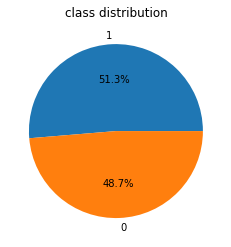

In [ ]:
plt.pie(data.target.value_counts().values , labels=data.target.value_counts().index,autopct='%1.1f%%')
plt.title('class distribution' , loc='center')
plt.show()

**Graph 2:** Age Distribution

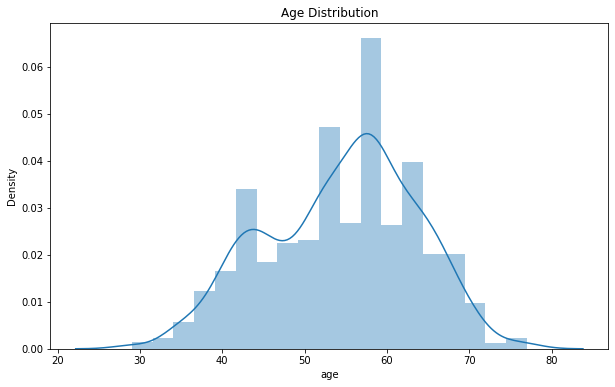

In [ ]:
def plot3():
    plt.figure(figsize=(10,6))
    sns.distplot(data['age'])
    plt.title('Age Distribution')
    plt.show()
plot3()  

In [ ]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
def cat_feature_plot(f_name):

 feature_value= data[f_name].value_counts().values
 feature_index= data[f_name].value_counts().index

 plt.figure(figsize=(15,5))
 plt.style.use('seaborn-bright')
 plt.suptitle('*'*10+'distribution of categorical feature : {}'.format(f_name)+'*'*10 , fontweight='heavy')

 plt.subplot(1,2,1)
 plt.pie(feature_value , labels=feature_index,autopct='%1.1f%%')
 plt.title('pie chart')


**Graph 3:** Gender Division

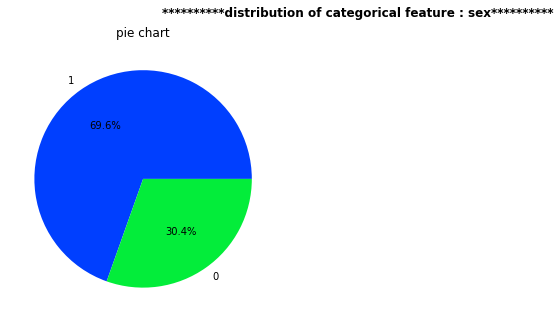

In [ ]:
cat_feature_plot('sex')

**Graph 4:** Chest Pain Type Graph (4 values)

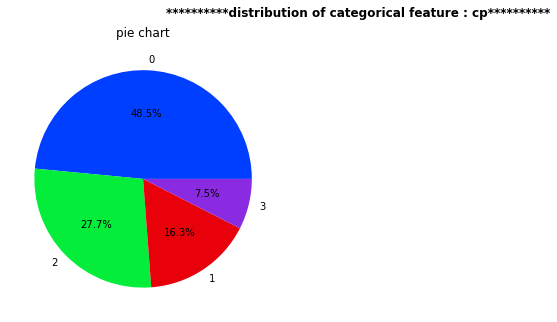

In [ ]:
cat_feature_plot('cp')

**Graph 5:** Fasting Blood Sugar (2values)

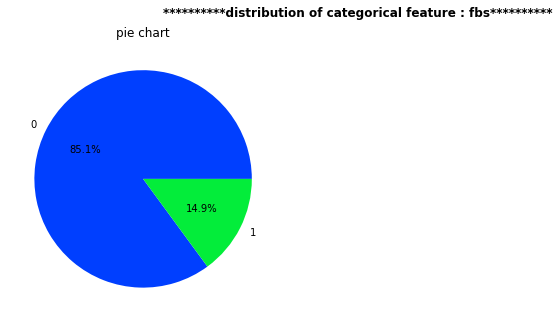

In [ ]:
cat_feature_plot('fbs')

**Graph 6:** Resting Electrocardiographic Results (values 0,1,2)

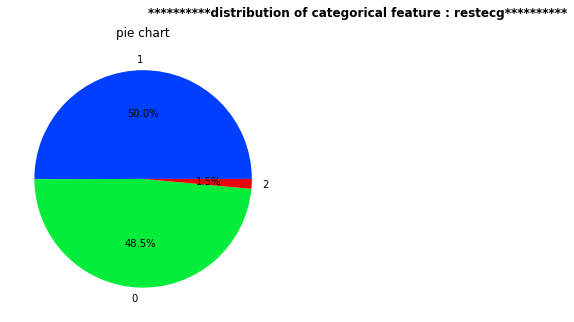

In [ ]:
cat_feature_plot('restecg')

**Graph 7:** Exercise Induced Angina (2 Values)

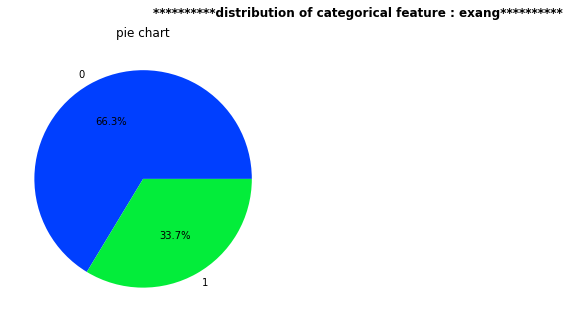

In [ ]:
cat_feature_plot('exang')

**Graph 8:** the slope of the peak exercise ST segment

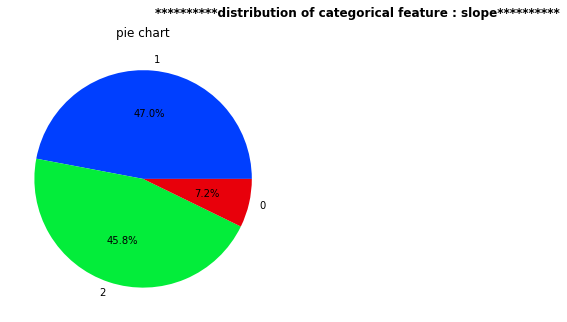

In [ ]:
cat_feature_plot('slope')

**Graph 9:** number of major vessels (0-3) colored by flourosopy (4 values)

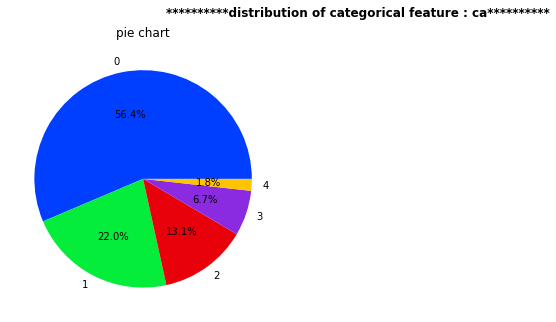

In [ ]:
cat_feature_plot('ca')

**Graph 10:** Thal Values (4 values)

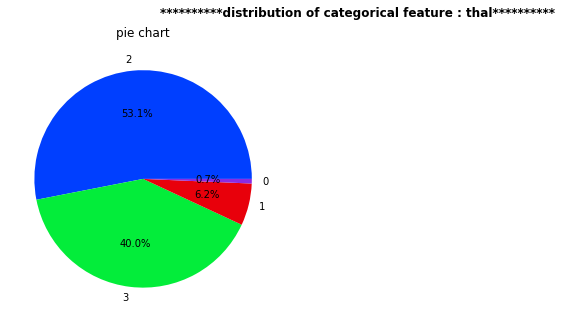

In [ ]:
cat_feature_plot('thal')

**Heat Map**

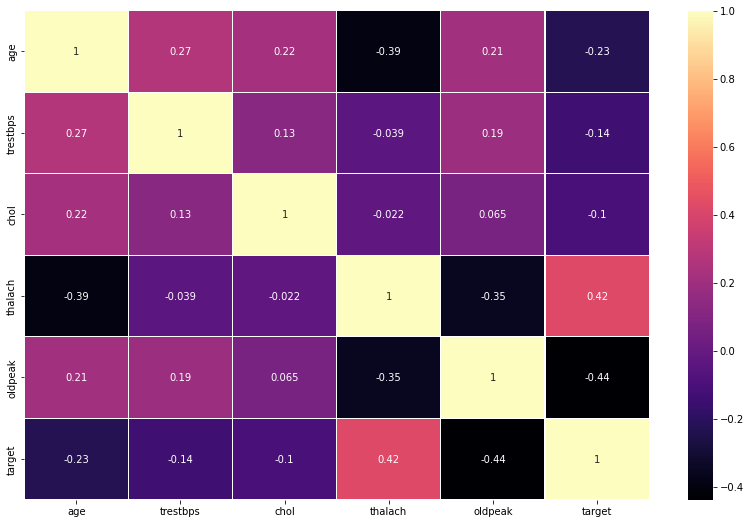

In [ ]:
plt.figure(figsize=(14, 9))
numerical_features=['age','trestbps', 'chol' , 'thalach','oldpeak']
numericalToTarget=numerical_features.append('target')
sns.heatmap(data[numerical_features].corr(), annot=True,cmap='magma', linewidths=0.1)

**Model Application**

In [22]:
import sklearn
import numpy as np

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
X = data.loc[:, data.columns!='target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [38]:
y = data.loc[:, data.columns=='target']
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, stratify=y )

In [47]:
print(X_train.shape)
print(X_test.shape)

(717, 13)
(308, 13)


In [48]:
print(y_train.shape)
print(y_test.shape)

(717, 1)
(308, 1)


**Model 1:** Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [50]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = model.predict(X_test)

In [53]:
print("accuracy", accuracy_score(y_test,y_pred)) #actual (the first argument), predicted (the second argument)

accuracy 1.0


**Model 2:** Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier()

In [64]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred = rf.predict(X_test)

In [67]:
print("accuracy", accuracy_score(y_test,y_pred)) #actual (the first argument), predicted (the second argument)

accuracy 1.0
